In [ ]:
#PREPROCESSING DATA
#LOADING DATASET
import numpy as np
import pandas as pd
data=pd.read_csv('TN_AQI.csv')
print(data.head(3))

   Stn Code Sampling Date       State City/Town/Village/Area  \
0        38      01-02-14  Tamil Nadu                Chennai   
1        38      01-07-14  Tamil Nadu                Chennai   
2        38      21-01-14  Tamil Nadu                Chennai   

                     Location of Monitoring Station  \
0  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
2  Kathivakkam, Municipal Kalyana Mandapam, Chennai   

                                    Agency Type of Location   SO2   NO2  \
0  Tamilnadu State Pollution Control Board  Industrial Area  11.0  17.0   
1  Tamilnadu State Pollution Control Board  Industrial Area  13.0  17.0   
2  Tamilnadu State Pollution Control Board  Industrial Area  12.0  18.0   

   RSPM/PM10  PM 2.5  
0       55.0     NaN  
1       45.0     NaN  
2       50.0     NaN  


# New Section

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPM/PM10                       2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


In [ ]:
data=data.drop('PM 2.5',axis=1)
data.head(5)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0


In [ ]:
d1=data.dropna()
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2862 non-null   int64  
 1   Sampling Date                   2862 non-null   object 
 2   State                           2862 non-null   object 
 3   City/Town/Village/Area          2862 non-null   object 
 4   Location of Monitoring Station  2862 non-null   object 
 5   Agency                          2862 non-null   object 
 6   Type of Location                2862 non-null   object 
 7   SO2                             2862 non-null   float64
 8   NO2                             2862 non-null   float64
 9   RSPM/PM10                       2862 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 246.0+ KB


In [ ]:
output_file_path = 'TN_AQI_1.xlsx'

# Save the DataFrame to an Excel file
d1.to_excel(output_file_path, index=False)

In [ ]:
#calculating index for PM10

def func_1(a):
  if(a<=50):
    return (((50-25)/(50-25))*(a-25))+25
  else:
    return (((100-50)/(100-50))*(a-50))+50

#calculating for pollutant NO2

def func_2(b):
  if(b<=21):
    return (((50-25)/(21-10.5))*(b-10.5))+25
  else:
      return (((100-50)/(53-21))*(b-21))+50
#calculating for s02 pollutant
def func_3(c):
  if(c<-11):
    return (((50-25)/(11-6))*(c-6))+25
  else:
    return (((100-50)/(31-11))*(-11))+50

In [ ]:
d1['I_PM10']=d1['RSPM/PM10'].apply(func_1)
d1['I_NO2']=d1['NO2'].apply(func_2)
d1['I_SO2']=d1['SO2'].apply(func_3)




<ipython-input-48-8c176f7e54fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['I_PM10']=d1['RSPM/PM10'].apply(func_1)
<ipython-input-48-8c176f7e54fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['I_NO2']=d1['NO2'].apply(func_2)
<ipython-input-48-8c176f7e54fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
d1['dates'] = pd.to_datetime(d1['Sampling Date'], format='%d-%m-%y')


<ipython-input-39-0a9876842725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['dates'] = pd.to_datetime(d1['Sampling Date'], format='%d-%m-%y')


In [ ]:
d2 = d1.sort_values(by='dates')
d2[["dates","Type of Location",	"SO2",	"NO2",	"RSPM/PM10"	,"I_PM10"	,"I_NO2",	"I_SO2"]]

,dates,Type of Location,SO2,NO2,RSPM/PM10,I_PM10,I_NO2,I_SO2
2417,2014-01-02,Industrial Area,13.0,21.0,101.0,101.0,50.000000,55.0
1300,2014-01-02,"Residential, Rural and other Areas",10.0,24.0,106.0,106.0,54.687500,45.0
1692,2014-01-02,Industrial Area,13.0,20.0,17.0,17.0,47.619048,55.0
1007,2014-01-02,"Residential, Rural and other Areas",4.0,24.0,60.0,60.0,54.687500,15.0
1308,2014-01-03,"Residential, Rural and other Areas",11.0,24.0,90.0,90.0,54.687500,50.0
...,...,...,...,...,...,...,...,...
912,2014-12-31,Industrial Area,20.0,42.0,19.0,19.0,82.812500,72.5
282,2014-12-31,Industrial Area,11.0,11.0,50.0,50.0,26.190476,50.0
1102,2014-12-31,"Residential, Rural and other Areas",4.0,25.0,60.0,60.0,56.250000,15.0
623,2014-12-31,"Residential, Rural and other Areas",14.0,20.0,42.0,42.0,47.619048,57.5


In [ ]:
output_file_path = 'TN_AQI_2.xlsx'

# Save the DataFrame to an Excel file
d2.to_excel(output_file_path, index=False)

In [ ]:
def func_4(a):
  if(a<=50):
    return "GOOD"
  if(a>50 and a<=100):
    return "SATISFACTORY"
  if(a>100 and a<=200):
    return "MODERATE"
  else:
    return "POOR"

In [ ]:
d2['AQI'] = d2[['I_PM10', 'I_NO2', 'I_SO2']].max(axis=1)
d2['QUALITY']=d2['AQI'].apply(func_4)

In [ ]:
d2[["dates","AQI","QUALITY"]]

,dates,AQI,QUALITY
2417,2014-01-02,101.0000,MODERATE
1300,2014-01-02,106.0000,MODERATE
1692,2014-01-02,55.0000,SATISFACTORY
1007,2014-01-02,60.0000,SATISFACTORY
1308,2014-01-03,90.0000,SATISFACTORY
...,...,...,...
912,2014-12-31,82.8125,SATISFACTORY
282,2014-12-31,50.0000,GOOD
1102,2014-12-31,60.0000,SATISFACTORY
623,2014-12-31,57.5000,SATISFACTORY


In [ ]:
output_file_path = 'TN_AQI_3.xlsx'

# Save the DataFrame to an Excel file
d2.to_excel(output_file_path, index=False)

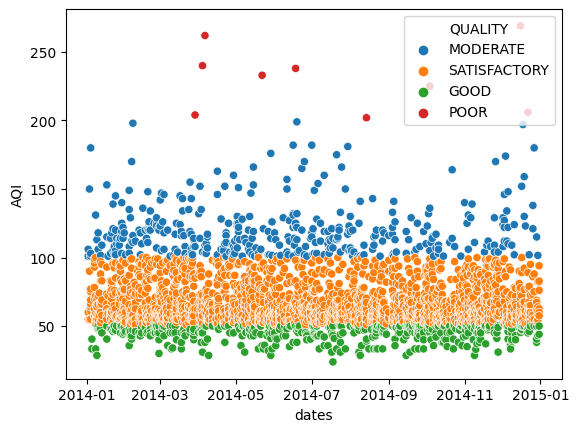

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="dates", y="AQI", hue="QUALITY", data=d2)
plt.show()

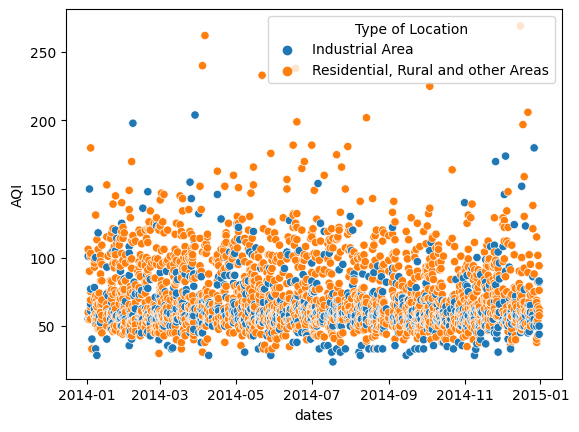

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="dates", y="AQI", hue="Type of Location", data=d2)
plt.show()